In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('911.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [7]:
df['zip'].value_counts().head(5)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [8]:
df['twp'].value_counts().head(5)

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [9]:
df['title'].nunique()

110

In [10]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [11]:
df['Reason'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

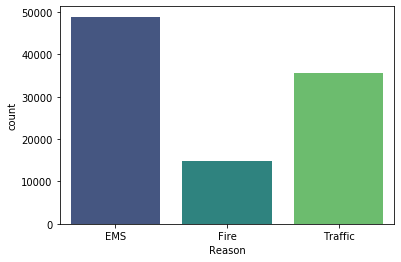

In [12]:
sns.countplot(x = 'Reason', data = df, palette = 'viridis')

In [13]:
type(df['timeStamp'])

pandas.core.series.Series

In [14]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [15]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['DayofWeek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [16]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
df['DayofWeek'] = df['DayofWeek'].map(dmap)

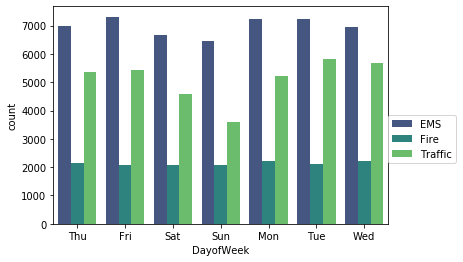

In [18]:
sns.countplot(x = 'DayofWeek',data = df,palette = 'viridis',hue = 'Reason')
plt.legend(bbox_to_anchor = (1,0.5), loc = 0, borderaxespad = 0)

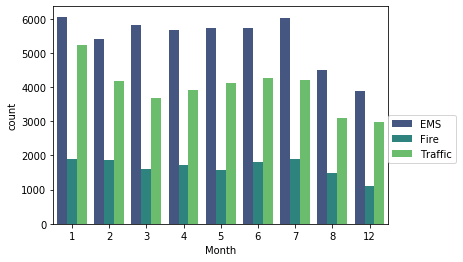

In [19]:
sns.countplot(x = 'Month',data = df,palette = 'viridis',hue = 'Reason')
plt.legend(bbox_to_anchor = (1,0.5), loc = 0, borderaxespad = 0)

In [20]:
byMonth = df.groupby(by = 'Month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,DayofWeek
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


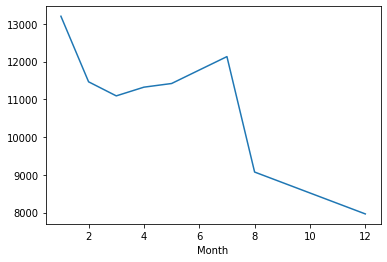

In [21]:
byMonth['twp'].plot()

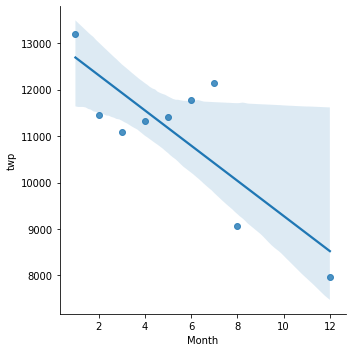

In [22]:
sns.lmplot(x = 'Month',y = 'twp',data = byMonth.reset_index())

In [23]:

df['Date'] = df['timeStamp'].apply(lambda t: t.date())

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

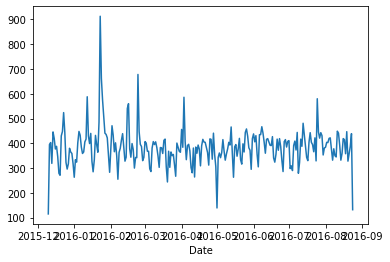

In [24]:
df.groupby(by = ['Date']).count()['twp'].plot()
plt.tight_layout

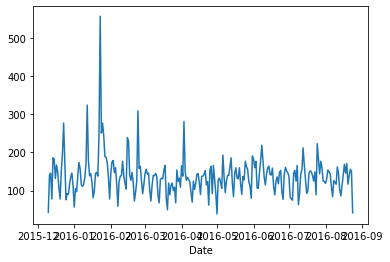

In [25]:
df[df['Reason'] == 'Traffic'].groupby(['Date']).count()['twp'].plot()

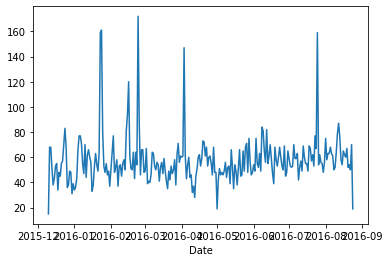

In [26]:
df[df['Reason'] == 'Fire'].groupby(['Date']).count()['twp'].plot()

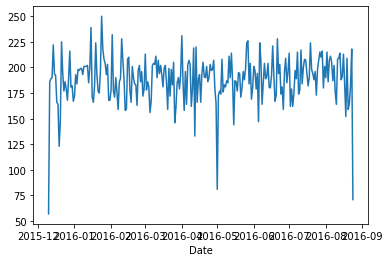

In [27]:
df[df['Reason'] == 'EMS'].groupby(['Date']).count()['twp'].plot()

In [28]:
dayHour = df.groupby(by = ['DayofWeek','Hour']).count()['Reason'].unstack()
dayHour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
DayofWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


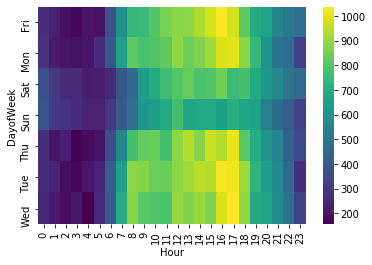

In [29]:
sns.heatmap(data = dayHour,cmap = 'viridis')

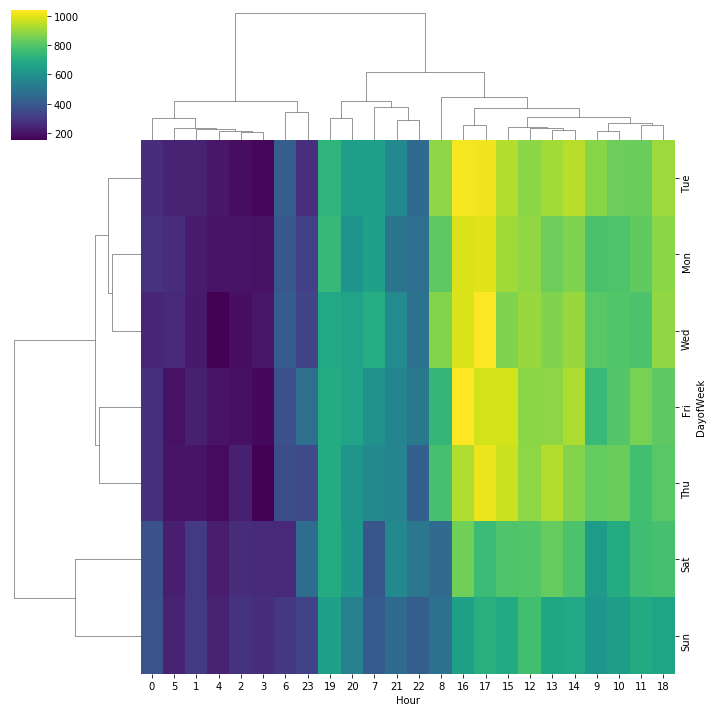

In [30]:
sns.clustermap(data = dayHour,cmap = 'viridis')

In [31]:
dayMonth = df.groupby(by = ['DayofWeek','Month']).count()['Reason'].unstack()
dayMonth.head()

Month,1,2,3,4,5,6,7,8,12
DayofWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


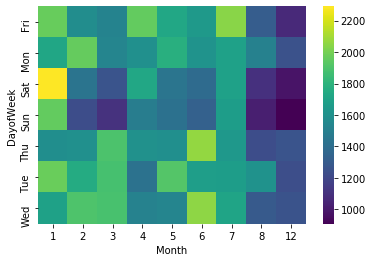

In [32]:
sns.heatmap(data = dayMonth,cmap = 'viridis')

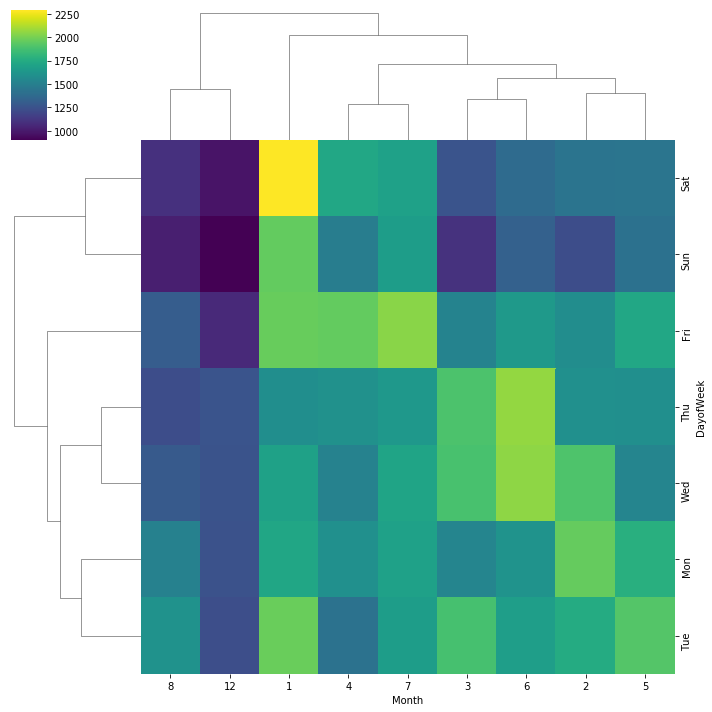

In [33]:
sns.clustermap(data = dayMonth,cmap = 'viridis')